In [1]:
#Classical Time Series Models:-

#1.AR[Auto_Regressive] Model
#2.MA[Moving_Average] Model
#3.ARMA[Combination of (AR+MA)] Model
#4.ARIMA[Auto_Regressive_Integrated_Moving_Averag] Model

import warnings
warnings.filterwarnings('ignore')

In [2]:
#1.Auto Regression Model Example [AR]- Suitable for data without trend and seasonal component

from statsmodels.tsa.ar_model import AutoReg

#Create a Linear Data

data = [10,12,14,16,18,20,20,22] #linear data

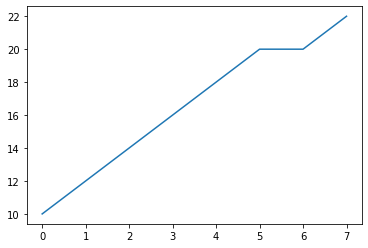

In [3]:
import matplotlib.pyplot as plt
plt.plot(data)

In [4]:
ARmodel = AutoReg(data, lags = 1) #calling Auto Regression Model considering AR-lag = 1 i.e, window(n=1)
ARmodel_fit = ARmodel.fit() #Fitting model

#Note:- AR(lags = 1) which is high level value i.e the last value in time series i.e here 6

In [5]:
#Making Predictions for next 3 values 8,9,10

ypredicted = ARmodel_fit.predict(8,10)
print(ypredicted)

[23.125      24.14453125 25.06848145]


In [6]:
pred_list = ypredicted.tolist()
combinedlist = data + pred_list

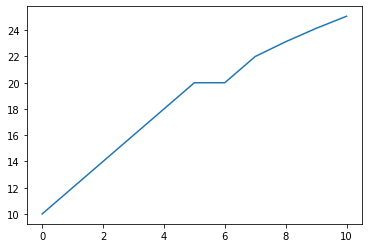

In [7]:
#Plot for the normal and combined observation with 8,9,10 predicted

plt.plot(combinedlist)

In [8]:
#2.Moving Average Model Example [MA]
#Note:- In model Moving Average works based on Residuals.

from statsmodels.tsa.arima_model import ARMA #Sitable for data without trend and seasonality 

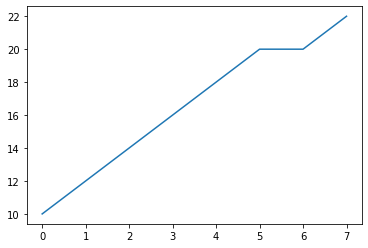

In [9]:
import matplotlib.pyplot as plt
plt.plot(data)

#Note:- Here AR model only considers only past trend and predict future predictions

In [10]:
#Fit the model

MAmodel = ARMA(data, order =(0,1)) #model with AR = 0 and MA = 1
MAmodel_fit = MAmodel.fit(disp = False)

In [11]:
#Make Predictions on the model

ypredicted = MAmodel_fit.predict(8,10)
print(ypredicted)

[20.51275988 16.49884854 16.49884854]


In [12]:
pred_list = ypredicted.tolist()
combinedlist = data + pred_list

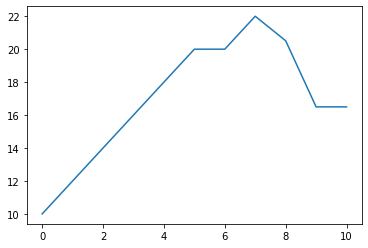

In [13]:
#Plot for the normal and combined observation with 8,9,10 predicted

plt.plot(combinedlist)

#Note:- Here MA model considers errors of the residuals and predicts future predictions.

#In real world AR and MA doesnot sole business problem independently so we combine both [AR + MA]ARMA

In [14]:
#3.Auto Regressive Moving AverageExample (ARMA)

#Import Data ----> Australian Drug Sales

import pandas as pd
DrugSalesData = pd.read_csv("E:\datafiles\TimeSeries.csv", parse_dates = ['Date'], index_col = 'Date')

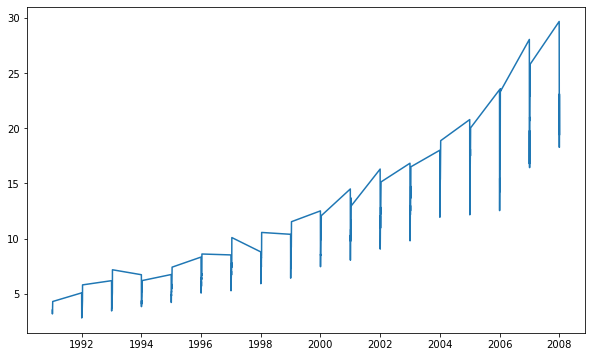

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

In [16]:
#Fit the ARMA model

#In previous MA model we have used (0,1) to make it Moving Average Model here in this ARMA we are using
#order (1,1) because here we require Auto Regression component also here.

ARMAmodel = ARMA(DrugSalesData['Value'], order = (1,1))
ARMAmodel_fit = ARMAmodel.fit(disp = False)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [17]:
#Make predictions from the (AR+MA) Combined model

#Here original time series data is at point 30 and predicted value is almost nearer to 22 hence it is good.

ypredicted = ARMAmodel_fit.predict(len(DrugSalesData), len(DrugSalesData)+2)
print(ypredicted)

204    21.237080
205    21.181942
206    21.127125
dtype: float64


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [18]:
#Auto Regressive Integrated Moving Average Model Exaple [ARIMA]

from statsmodels.tsa.arima_model import ARIMA

In [19]:
#Fit the ARMA model

#Here parameters p, d, q are very important in ARIMA Model.

#A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, 
#p is the number of autoregressive terms, 
#d is the number of nonseasonal differences needed for stationarity, and. 
#q is the number of lagged forecast errors in the prediction equation.

#p = Auto Regression Component ----> if we need AR = 1,2,3...
#d = Integration Component, depends on ACF, PACF and how many lags we need to consider for integartion.
#q = Moving Average Component ----> if we need MA = 1,2,3...

ARIMAmodel = ARIMA(DrugSalesData['Value'], order = (1, 1, 1)) #notice p,d and q value here
ARIMAmodel_fit = ARIMAmodel.fit(disp = False)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [20]:
#Make predictions from the model

ypredicted = ARIMAmodel_fit.predict(len(DrugSalesData), len(DrugSalesData)+2, typ = 'levels')
print(ypredicted)

203    21.584632
204    22.326893
205    22.626181
dtype: float64


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
